In [1]:
library(Seurat)
library(ggplot2)
library(ggrepel)
library(ggpubr)
library(cowplot)

Attaching SeuratObject

Attaching sp


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




In [2]:
all_prop = read.csv('./data/cellProportion_macroSubs_Tsubs_CD45.csv',row.names=1,check.names = F)
treat = sapply(rownames(all_prop),function(x){
        strsplit(x, '_')[[1]][1]
})

In [3]:
macro_celltypes = c( 'Macro-CXCL1','Macro-FOLR2','Macro-MMP9','Macro-PDCL2','Macro-PLA2G2D','Macro-TUBA1B','Mast cells', 'mDC',
                    'Mono-CCL4', 'Mono-CD55', 'Mono-TXNIP','pDC','cDC1','cDC2','Neutrophils')
pre_cor = cor(all_prop[which(treat == 'Pre'),])
sort(pre_cor['CD8+ Tex-SPRY1',macro_celltypes],decreasing = T)

Macro-MMP9   Neutrophils     Mono-CCL4    Mast cells   Macro-CXCL1 
   0.82983345    0.53787097    0.46514643    0.40801715    0.38041114 
  Macro-FOLR2   Macro-PDCL2     Mono-CD55           mDC          cDC2 
   0.31129230    0.05614824   -0.03934889   -0.12066402   -0.22926469 
   Mono-TXNIP Macro-PLA2G2D  Macro-TUBA1B           pDC          cDC1 
  -0.32000023   -0.37708560   -0.50086748   -0.51495129   -0.72529085

In [4]:
plot_data = data.frame(sort(pre_cor['CD8+ Tex-SPRY1',macro_celltypes],decreasing = T))
colnames(plot_data) = 'cor'
plot_data$celltype = rownames(plot_data)
plot_data

,cor,celltype
,<dbl>,<chr>
Macro-MMP9,0.82983345,Macro-MMP9
Neutrophils,0.53787097,Neutrophils
Mono-CCL4,0.46514643,Mono-CCL4
Mast cells,0.40801715,Mast cells
Macro-CXCL1,0.38041114,Macro-CXCL1
Macro-FOLR2,0.31129230,Macro-FOLR2
Macro-PDCL2,0.05614824,Macro-PDCL2
Mono-CD55,-0.03934889,Mono-CD55
mDC,-0.12066402,mDC


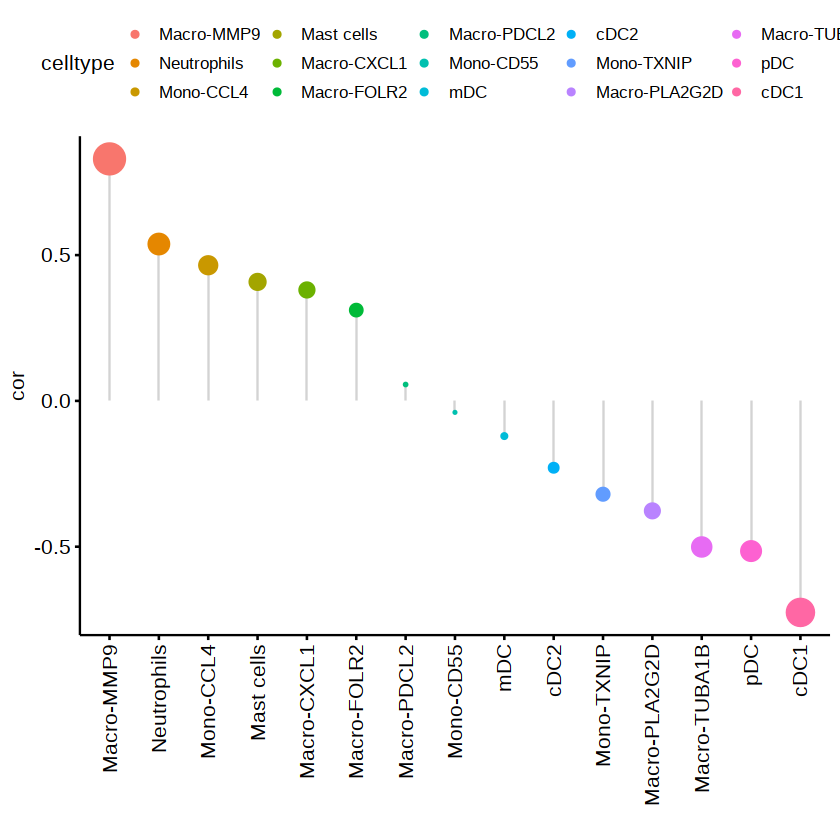

In [5]:
ggdotchart(plot_data, x = "celltype", y = "cor",
           color = "celltype",               
           add = "segments",    
           sorting = "descending",
           xlab="",
           dot.size = abs(plot_data$cor)*10
)

In [6]:
change_cor = cor(all_prop[which(treat == 'Post'),] - all_prop[which(treat == 'Pre'),])
sort(change_cor['CD8+ Tex-SPRY1',macro_celltypes],decreasing = T)

Macro-MMP9   Macro-CXCL1     Mono-CCL4 Macro-PLA2G2D  Macro-TUBA1B 
   0.32633823    0.24811171    0.24685940    0.19728216    0.17148147 
   Mono-TXNIP     Mono-CD55    Mast cells   Neutrophils           pDC 
   0.13592602    0.12906199    0.05804698    0.04152836   -0.01096447 
         cDC2   Macro-FOLR2          cDC1           mDC   Macro-PDCL2 
  -0.04986020   -0.05084809   -0.14279961   -0.20446764   -0.24572881

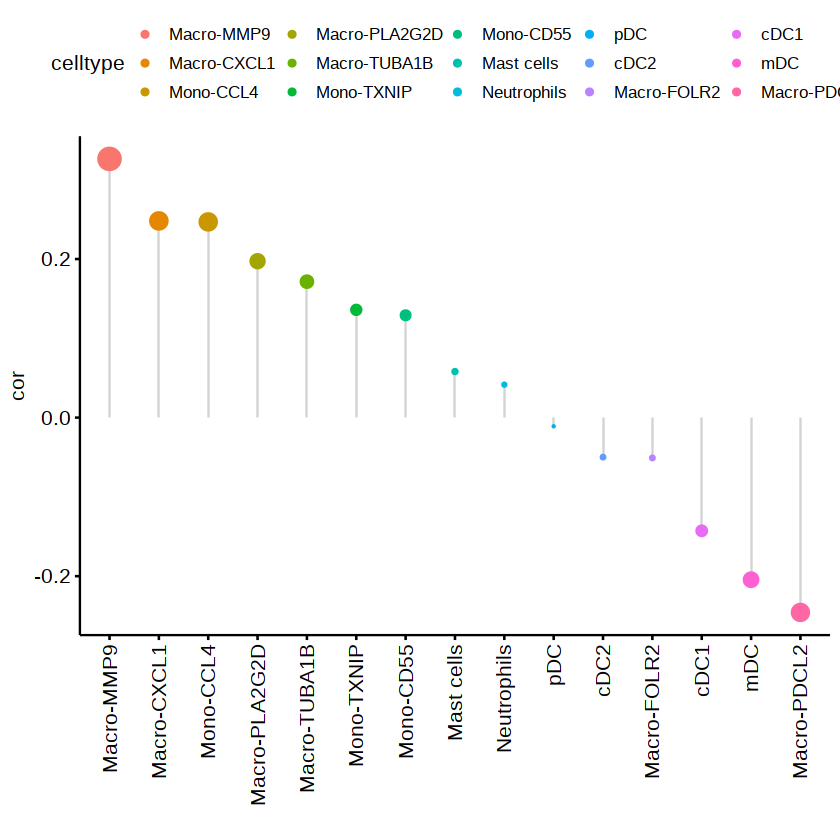

In [7]:
plot_data = data.frame(sort(change_cor['CD8+ Tex-SPRY1',macro_celltypes],decreasing = T))
colnames(plot_data) = 'cor'
plot_data$celltype = rownames(plot_data)

ggdotchart(plot_data, x = "celltype", y = "cor",
           color = "celltype",               
           add = "segments",    
           sorting = "descending",
           xlab="",
           dot.size = abs(plot_data$cor)*18
)